# <center><b><u><span style="color:#ff6600">Building a Next Best Action model for Standard Bank</span></u></b></center>

<center><img src="https://d9seco0wfq8yu.cloudfront.net/thumb/maker/8m44Ap1VON.jpeg" alt="Image" width="1200" height="500"></center>


### <center><u><b><span style="color:#ff6600">Problem Statement</span></b></u></center>
Modern customer analytics and personalization systems use a wide variety of methods that help to reveal and quantify customer preferences and intent, making marketing messages, ads, offers, and recommendations more relevant and engaging. However, most of these methods are designed to optimize only one immediate interaction with a customer and use objective functions defined through metrics like a `click-through rate (CTR)` or `conversion rate (CR)`. This problem can be particularly important in industries like retail banking and telecom where customer relationships evolve over long periods of time.

`In this project we must combine high performing classification engine with recommendation engine. 
This Project consists of two stages:`
- Stage-1: **Classification Engine:** Create High Performing Classification Engine(Which Classifies Churn customer or non-churn customer based on data provided)
- Stage-2: **Recommendation Engine:** Create a dummy dataset related to Types of Churn customers and right product recommendation to make them non churn customers. 

Note1: `Recommendations need to increase more conversion rate, so we can convert churn customers into non-churn customers.`

Note2: `With improper classification engine, we can make this Next Best Action project successful. So, make sure classification engine going to give high quality performance.`



### <center><u><b><span style="color:#ff6600">Aim</span></b></u></center>
* To classify the potential `churn customers` based on `numerical` and `categorical features`.
* It is a `binary classification` problem for an `imbalanced dataset`.



### <center><b><u><span style="color:#ff6600">DATASET DESCRIPTION</span></u></b></center>
1. `CIF`: Customer Identification Number, a unique identifier assigned to each customer.
2. `CUS_DOB`: Customer Date of Birth, indicating the birthdate of the customer.
3. `AGE`: Age of the customer, derived from the date of birth.
4. `CUS_Month_Income`: Monthly income of the customer.
5. `CUS_Gender`: Gender of the customer (e.g., Male, Female).
6. `CUS_Marital_Status`: Marital status of the customer (e.g., Single, Married, Divorced).
7. `CUS_Customer_Since`: Date since the customer has been associated with the bank.
8. `YEARS_WITH_US`: Number of years the customer has been with the bank.
9. `# total debit transactions for S1`: Number of debit transactions in the first quarter (S1).
10. `# total debit transactions for S2`: Number of debit transactions in the second quarter (S2).
11. `# total debit transactions for S3`: Number of debit transactions in the third quarter (S3).
12. `total debit amount for S1`: Total amount debited in the first quarter (S1).
13. `total debit amount for S2`: Total amount debited in the second quarter (S2).
14. `total debit amount for S3`: Total amount debited in the third quarter (S3).
15. `# total credit transactions for S1`: Number of credit transactions in the first quarter (S1).
16. `# total credit transactions for S2`: Number of credit transactions in the second quarter (S2).
17. `# total credit transactions for S3`: Number of credit transactions in the third quarter (S3).
18. `total credit amount for S1`: Total amount credited in the first quarter (S1).
19. `total credit amount for S2`: Total amount credited in the second quarter (S2).
20. `total credit amount for S3`: Total amount credited in the third quarter (S3).
21. `total debit amount`: Total amount debited across all quarters.
22. `total debit transactions`: Total number of debit transactions across all quarters.
23. `total credit amount`: Total amount credited across all quarters.
24. `total credit transactions`: Total number of credit transactions across all quarters.
25. `total transactions`: Total number of transactions (both debit and credit) across all quarters.
26. `CUS_Target`: Target variable indicating the status or behavior of the customer.
27. `TAR_Desc`: Description of the target variable.
28. `Status`: Additional status or information related to the customer.


### <center><b><u><span style="color:#ff6600">IMPORTING LIBRARIES</span></u></b></center>

In [1]:
from colorama import Fore 
print(Fore.YELLOW+"\n... IMPORTS STARTING ...\n")

print("\n\tVERSION INFORMATION")
import sys
sys.path.append("../src/")
import os
import random
import pandas as pd; print(Fore.YELLOW+f"\t\t- PANDAS VERSION: {pd.__version__}")
import matplotlib; print(Fore.YELLOW+f"\t\t- MATPLOTLIB VERSION: {matplotlib.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns; print(Fore.YELLOW+f"\t\t- SEABORN VERSION: {sns.__version__}")
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(Fore.YELLOW+f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(Fore.YELLOW+f"\t\t– SKLEARN VERSION: {sklearn.__version__}");
import scipy; print(Fore.YELLOW+f"\t\t– scipy VERSION: {scipy.__version__}");

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree

from scipy.stats import skew
from colorama import Fore 
import warnings

# my python files
import helper
import config

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

colours=["#8f7198", "#003f5c"]
test_color = Fore.YELLOW

print(Fore.YELLOW+"\n\n... IMPORTS COMPLETE ...\n")
helper.seed_it_all()
%matplotlib inline


... IMPORTS STARTING ...


	VERSION INFORMATION
		- PANDAS VERSION: 2.2.1
		- MATPLOTLIB VERSION: 3.8.3
		- SEABORN VERSION: 0.13.2
		– NUMPY VERSION: 1.26.4
		– SKLEARN VERSION: 1.4.1.post1
		– scipy VERSION: 1.12.0


... IMPORTS COMPLETE ...



In [2]:
df = pd.read_excel(config.TRAINING_FILE, na_values="NaN")
df.drop('CIF', axis=1, inplace=True)
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


### <center><b><u><span style="color:#ff6600">CHECKING DATA SHAPE</span></u></b></center>

In [9]:
print(Fore.YELLOW + f"We have [{Fore.RED}{df.shape[0]}{Fore.YELLOW}] samples and [{Fore.RED}{df.shape[1]}{Fore.YELLOW}] features in our Dataset")


We have [1249] samples and [27] features in our Dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [11]:
# Fetching those columns which have null values 
df.isnull().sum().reset_index(name="total_missing").query('total_missing != 0').style.background_gradient()

,index,total_missing
2,CUS_Month_Income,11
3,CUS_Gender,2


 **There are some instances where the `monthly incom`e and `gender` of the customers are not recorded in the dataset. Handling these missing values appropriately, such as through imputation or exclusion, will be essential for maintaining the integrity and accuracy of any analysis or model built using this data.**

In [12]:
# Checking for duplicate entery
df[df.duplicated()]

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status


**Duplicated records in the dataset can bias the model by inflating the importance of certain observations, leading to overfitting. Additionally, they can distort statistical measures and undermine the model's generalization ability by introducing redundant information.**

In [13]:
sc_table = df.describe().T.style.background_gradient(cmap='viridis')
caption = "Descriptive Statistics for Numeric Columns"
sc_table.set_caption(caption)
sc_table

,count,mean,min,25%,50%,75%,max,std
AGE,1249.000000,46.746998,14.000000,39.000000,46.000000,55.000000,119.000000,12.315109
CUS_Month_Income,1238.000000,2764868.802916,0.000000,7568.750000,1500000.000000,3000000.000000,80000000.000000,5406761.319555
CUS_Customer_Since,1249,2005-06-16 05:28:34.971977472,1991-10-31 00:00:00,2005-06-17 00:00:00,2005-08-26 00:00:00,2005-10-12 00:00:00,2019-04-04 00:00:00,nan
YEARS_WITH_US,1249.000000,14.116894,0.000000,14.000000,14.000000,14.000000,28.000000,2.279882
# total debit transactions for S1,1249.000000,54.262610,0.000000,7.000000,22.000000,65.000000,715.000000,80.732325
# total debit transactions for S2,1249.000000,55.680544,0.000000,6.000000,24.000000,65.000000,547.000000,81.020146
# total debit transactions for S3,1249.000000,56.966373,0.000000,6.000000,24.000000,68.000000,757.000000,84.649516
total debit amount for S1,1249.000000,314743.857166,0.000000,11550.000000,53956.320000,189277.460000,35733493.370000,1513433.142078
total debit amount for S2,1249.000000,309041.755933,0.000000,11225.780000,61581.300000,209650.000000,37233815.610000,1293927.962381
total debit amount for S3,1249.000000,306145.741497,0.000000,7085.000000,59073.910000,225061.860000,18665107.090000,938577.504819


### <center><b><u><span style="color:#ff6600">Observations:</span></u></b></center>


1. **Age Distribution**: The average age of customers is approximately 46 years, with a minimum age of 14 and a maximum of 119. Identifying outliers in age can help in ensuring data accuracy.

2. **Income Variability**: The monthly income varies significantly, with an average of approximately 2.76 million units. However, there are 11 missing values in this feature that need to be addressed to prevent bias in the analysis.

3. **Customer Tenure**: On average, customers have been associated with the bank for about 14 years. Understanding customer tenure can aid in assessing loyalty and potential churn risks.

4. **Transaction Patterns**: The number of debit and credit transactions across different quarters varies widely, suggesting diverse customer behaviors. Examining transaction trends can reveal insights into spending habits and financial activity.

5. **Transaction Amounts**: Total debit and credit amounts show considerable variability, with maximum values reaching millions. Detecting outliers and ensuring consistency in recording transaction amounts are essential for accurate analysis.

6. **Churn Target Distribution**: The churn target variable exhibits a narrow range, with most values clustered around 2222. Ensuring balanced representation of churn and non-churn instances is crucial for model training.

7. **Data Completeness**: Missing values exist in certain features such as 'CUS_Month_Income' and 'CUS_Customer_Since', indicating the need for data imputation or removal to maintain dataset integrity.

8. **Transaction Frequency**: Customers engage in varying numbers of debit and credit transactions, with some outliers potentially skewing the distribution. Identifying and addressing such outliers can improve model performance.

9. **Transaction Volume**: The total number of transactions per customer ranges from 1 to 2174, reflecting diverse engagement levels. Understanding transaction volume can aid in segmenting customers and targeting retention strategies.

10. **Overall Data Quality**: Assessing data completeness, accuracy, and consistency is crucial for building a reliable churn prediction model. Addressing missing values, outliers, and data discrepancies is essential to ensure the quality and reliability of the dataset for analysis and modeling purposes.

In [14]:
sc_table = df.describe(include='object').T.style.background_gradient()
caption = "Descriptive Statistics for Categorical Columns"
sc_table.set_caption(caption)
sc_table

,count,unique,top,freq
CUS_DOB,1249,1161,Jan 1 1964 12:00AM,8
CUS_Gender,1247,2,MALE,741
CUS_Marital_Status,1249,6,SINGLE,879
TAR_Desc,1249,4,LOW,753
Status,1249,2,ACTIVE,1022


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

1. The dataset has a majority of male customers `(741 out of 1247)` with a frequent occurrence of the `MALE` gender label.
    
2. A significant portion of customers in the dataset is marked as `SINGLE` based on the `cus_marital_status` feature, which appears 879 times out of 1249.
    
3. The majority of customers in the dataset have a target description labeled as `LOW` (753 occurrences out of 1249).
    
4. The dataset is imbalanced towards the `ACTIVE` status, with 1022 occurrences compared to `CHURN` in the `status` feature.
</div>

In [15]:
df['CUS_DOB']

0       Feb 13 1970 12:00AM
1       Sep 20 1973 12:00AM
2       Jul 18 1966 12:00AM
3       Jan  9 2004 12:00AM
4       Mar  7 1971 12:00AM
               ...         
1244    Sep 10 1951 12:00AM
1245    Mar 23 1984 12:00AM
1246    Feb  4 1985 12:00AM
1247    Feb  3 1950 12:00AM
1248    Feb 23 1961 12:00AM
Name: CUS_DOB, Length: 1249, dtype: object

In [20]:
# Let's convert `CUS_DOB` column to datetime format
df['CUS_DOB'] = pd.to_datetime(df['CUS_DOB'])

In [32]:
# Let's rename the column names

# Renaming coloumns name

new_cols_name = {
    'CUS_DOB' : "cus_dob",
    'AGE' : "age",
    'CUS_Month_Income' : "cus_month_income",
    'CUS_Gender' : "cus_gender",
    'CUS_Marital_Status' : "cus_marital_status",
    'CUS_Customer_Since' : "cus_customer_since",
    'YEARS_WITH_US' : "years_with_us",
    '# total debit transactions for S1':"total_debit_trans_s1",
    '# total debit transactions for S2':"total_debit_trans_s2",
    '# total debit transactions for S3':"total_debit_trans_s3", 
    'total debit amount for S1':"total_debit_amt_s1",
    'total debit amount for S2': "total_debit_amt_s2", 
    'total debit amount for S3' : "total_debit_amt_s3",
    '# total credit transactions for S1' : "total_credit_trans_s1",
    '# total credit transactions for S2': "total_credit_trans_s2",
    '# total credit transactions for S3': "total_credit_trans_s3", 
    'total credit amount for S1' : "total_credit_amt_s1",
    'total credit amount for S2':"total_credit_amt_s2",
    'total credit amount for S3':"total_credit_amt_s3",
    'total debit amount': "total_debit_amt", 
    'total debit transactions': "total_debit_trans", 
    'total credit amount': "total_credit_amt",
    'total credit transactions' : "total_credit_trans", 
    'total transactions': "total_transactions", 
    'CUS_Target' : "cus_target",
    'TAR_Desc' : "tar_desc",
    'Status' : "status"
}

df.rename(columns=new_cols_name, inplace=True)

In [33]:
df.columns

Index(['cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       'total_debit_trans_s1', 'total_debit_trans_s2', 'total_debit_trans_s3',
       'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
       'total_credit_trans_s1', 'total_credit_trans_s2',
       'total_credit_trans_s3', 'total_credit_amt_s1', 'total_credit_amt_s2',
       'total_credit_amt_s3', 'total_debit_amt', 'total_debit_trans',
       'total_credit_amt', 'total_credit_trans', 'total_transactions',
       'cus_target', 'tar_desc', 'status'],
      dtype='object')

In [23]:
df

,cus_dob,age,cus_month_income,cus_gender,cus_marital_status,cus_customer_since,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,total_debit_amt_s1,total_debit_amt_s2,total_debit_amt_s3,total_credit_trans_s1,total_credit_trans_s2,total_credit_trans_s3,total_credit_amt_s1,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
0,1970-02-13,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,1973-09-20,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,1966-07-18,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,2004-01-09,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,1971-03-07,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1951-09-10,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,1,3069.60,2376.00,200.00,0,0,0,0.00,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,1984-03-23,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,37,119297.02,118884.00,147554.88,7,6,9,114601.14,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,1985-02-04,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,424,1068684.72,571814.89,833122.07,63,76,78,936134.09,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,1950-02-03,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,234,397602.73,514584.25,459665.24,11,14,23,377245.00,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [24]:
x=df.groupby(['status'])['status'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
# mf_ratio.rename(columns={0: "non_churn", 1: "churn"}, inplace=True)
mf_ratio

status,ACTIVE,CHURN
status,0.82,0.18


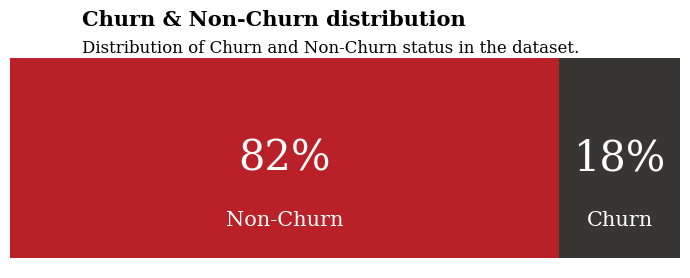

In [27]:

status_counts = df['status'].value_counts()

total_count = len(df)

status_ratio = (status_counts / total_count).round(2)

status_ratio_df = pd.DataFrame(status_ratio).T

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(7, 2.5))

ax.barh(status_ratio_df.index, status_ratio_df["ACTIVE"], color='#b20710', alpha=0.9, label='Churn')
ax.barh(status_ratio_df.index, status_ratio_df["CHURN"], left=status_ratio_df["ACTIVE"], color='#221f1f', alpha=0.9, label='Non-Churn')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in status_ratio_df.index:
    ax.annotate(f"{int(status_ratio_df["ACTIVE"][i] * 100)}%", 
                   xy=(status_ratio_df["ACTIVE"][i] / 2, i),
                   va='center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Non-Churn", 
                   xy=(status_ratio_df["ACTIVE"][i] / 2, -0.25),
                   va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate(f"{int(status_ratio_df["CHURN"][i] * 100)}%", 
                   xy=(status_ratio_df["ACTIVE"][i] + status_ratio_df["CHURN"][i] / 2, i),
                   va='center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Churn", 
                   xy=(status_ratio_df["ACTIVE"][i] + status_ratio_df["CHURN"][i] / 2, -0.25),
                   va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125, 1.03, 'Churn & Non-Churn distribution', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.92, 'Distribution of Churn and Non-Churn status in the dataset.', fontfamily='serif', fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.tight_layout()
plt.savefig("../plots/target_class_dist.png")
plt.show()


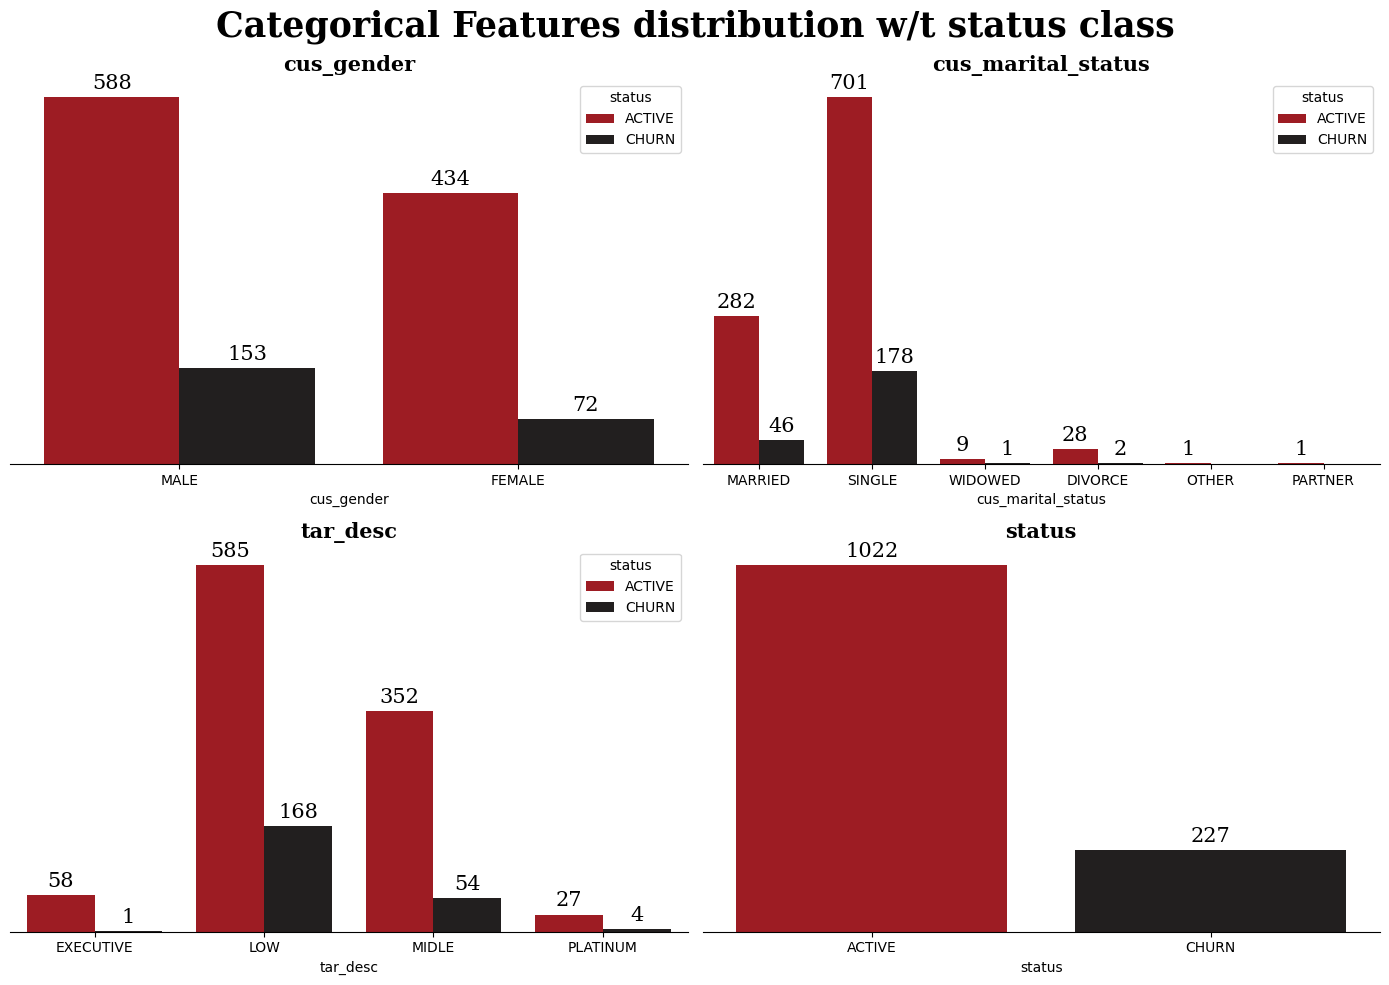

In [35]:
# Replace status class names
# df['status'] = df['status'].map({0: 'Non-churn', 1: 'Churn'})

# Define categorical features and colors
categorical_features = ['cus_gender', 'cus_marital_status', 'tar_desc', 'status']
colors = ["#b20710", "#221f1f"]

# Create subplots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    plt.suptitle("Categorical Features distribution w/t status class", fontsize=25, fontweight='bold', fontfamily='serif')
    sns.countplot(x=feature, hue='status', data=df, palette=colors)
    plt.title(feature, fontfamily='serif', fontsize=15, fontweight='bold')
    plt.gca().spines['left'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)  
    plt.gca().spines['top'].set_visible(False) 
    plt.gca().tick_params(axis='y', which='both', left=False, labelleft=False) 
    plt.gca().set_ylabel('')

    # Annotate counts on each bar
    for patch in plt.gca().patches:
        height = patch.get_height()
        if height > 0:
            plt.gca().annotate('{}'.format(int(height)),
                               xy=(patch.get_x() + patch.get_width() / 2, height),
                               xytext=(0, 3), 
                               textcoords="offset points",
                               ha='center', va='bottom', fontsize=15, fontweight='light', fontfamily='serif')

plt.tight_layout()
plt.savefig("../plots/categorical_features_dist_with_status.png")

plt.show()


### <center><b><u><span style="color:#ff6600">Obervations:</span></u></b></center>
- The bank may have a larger `male` customer base compared to `female` customers.
- The churn rate among `male` customers (153 out of 741, approximately `20.6%`) is higher than among female customers (72 out of 506, approximately `14.2%`).This indicates that the bank may need to investigate reasons why male customers are more likely to churn compared to female customers.
- `Singles` might have fewer financial obligations compared to `married` individuals, making it easier for them to switch banks or financial products. They might also be more prone to exploring different banking options for better deals or perks.
- `Married` individuals may have joint accounts, mortgages, or other financial products that are more cumbersome to switch. Additionally, they might prioritize stability and continuity in their banking relationships due to shared financial responsibilities due to that `married` individuals have a relatively `lower churn` count compared to `singles`.
- `Widowed` individuals might have settled financial arrangements or be less inclined to change their banking relationships due to fewer changes in their financial circumstances compared to `singles` or `divorced` individuals.
- The `others` and `partner` categories might represent unconventional or less common `marital statuses`, resulting in fewer data points. The lack of churn instances could also indicate that individuals in these categories have stable financial arrangements or are not actively seeking new banking options.
- `Divorce` may lead to significant changes in financial arrangements, including banking relationships. Divorcees might be more inclined to switch banks to separate finances or seek better financial management options post-divorce.

In [7]:
target_maps = {
    'ACTIVE' : 0,
    "CHURN" : 1
}
df.status = df.status.map(target_maps)

AttributeError: 'DataFrame' object has no attribute 'status'

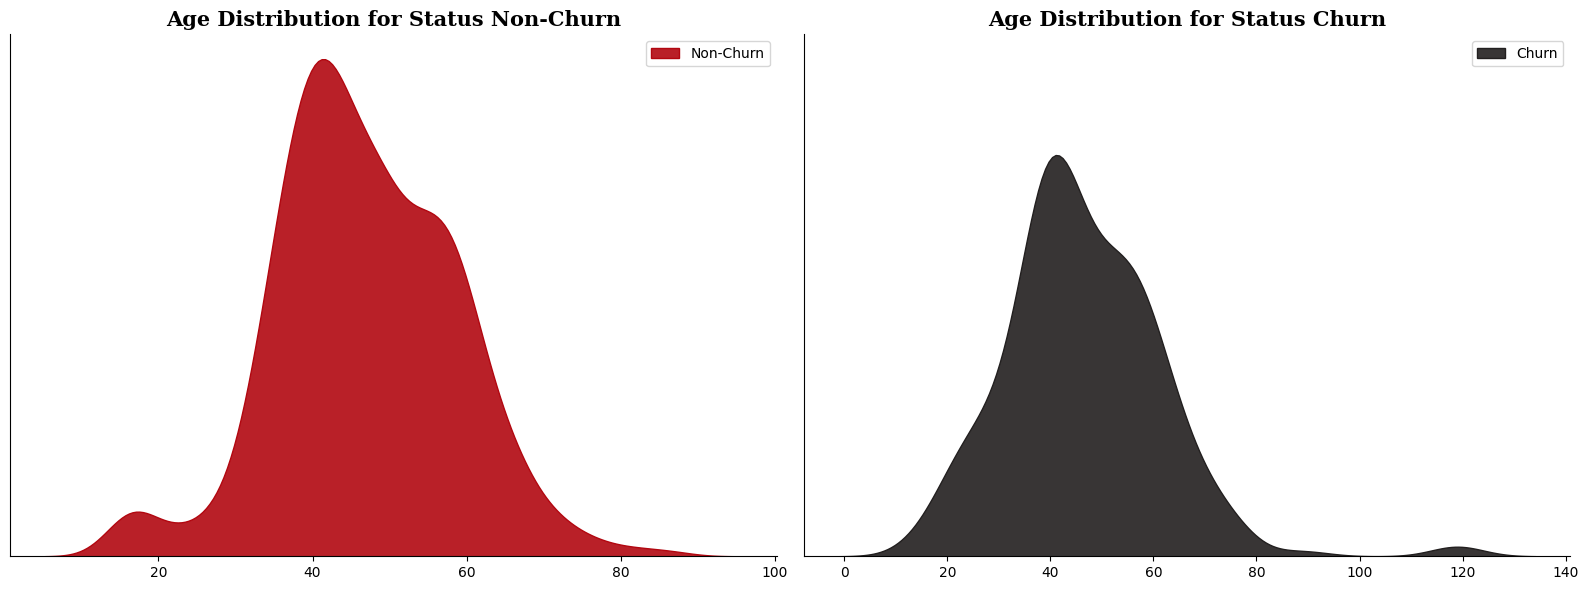

In [37]:
# Define legend labels for each status class
legend_labels = ['Non-Churn', 'Churn']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot KDE plots for each status class
for ax, status, color, legend_label in zip(axes, df['status'].unique(), colors, legend_labels):
    sns.kdeplot(data=df[df['status'] == status], x='age', color=color, fill=True, alpha=0.9, ax=ax)
    ax.set_title(f'Age Distribution for Status {legend_label}',fontfamily='serif', fontsize=15, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(True)  # Remove left spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide left y-axis ticks and labels
    ax.legend([legend_label], loc='upper right')

max_y = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_y)
plt.tight_layout()
plt.savefig("../plots/ppts_figs/age_dist_with_status.png")
plt.show()

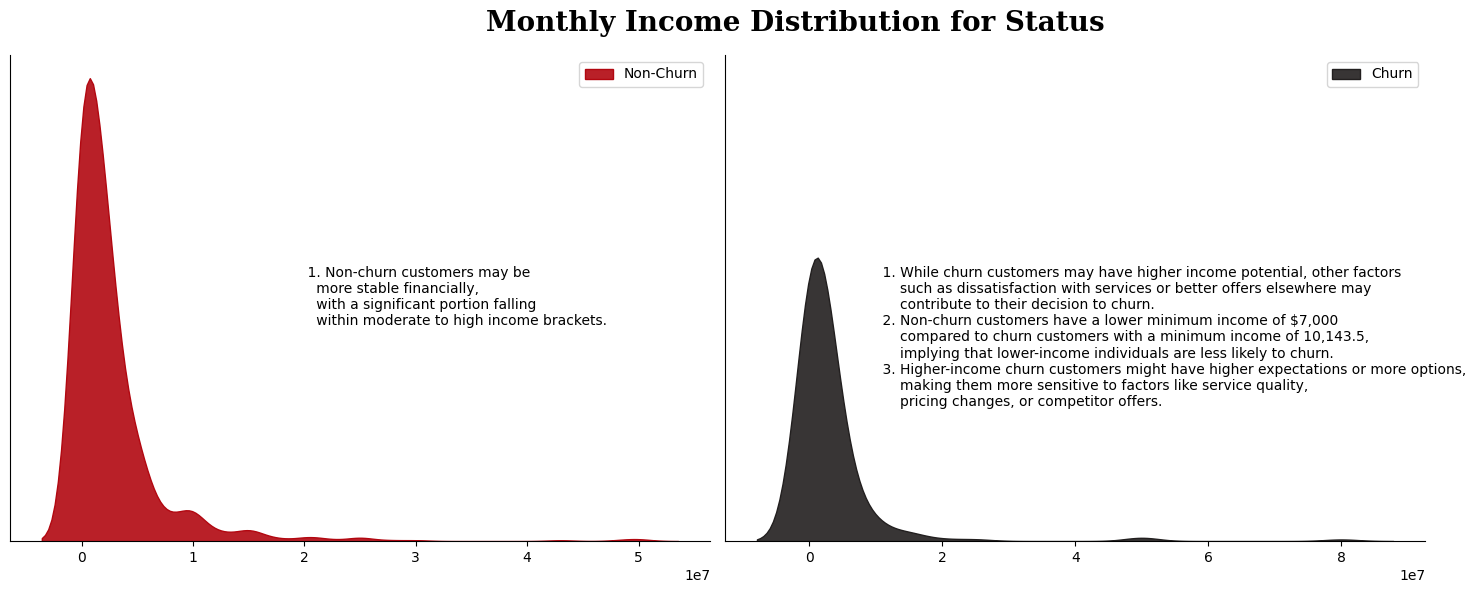

In [94]:
# Define legend labels for each status class
legend_labels = ['Non-Churn', 'Churn']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot KDE plots for each status class
for ax, status, color, legend_label in zip(axes, df['status'].unique(), colors, legend_labels):
    sns.kdeplot(data=df[df['status'] == status], x='cus_month_income', color=color, fill=True, alpha=0.9, ax=ax)
    plt.suptitle(f'Monthly Income Distribution for Status',fontfamily='serif', fontsize=20, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(True)  # Remove left spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide left y-axis ticks and labels
    ax.legend([legend_label], loc='upper right')
    non_churn = """
    1. Non-churn customers may be 
      more stable financially, 
      with a significant portion falling 
      within moderate to high income brackets.
    """
    churn = """
    1. While churn customers may have higher income potential, other factors 
        such as dissatisfaction with services or better offers elsewhere may 
        contribute to their decision to churn.
    2. Non-churn customers have a lower minimum income of $7,000 
        compared to churn customers with a minimum income of 10,143.5, 
        implying that lower-income individuals are less likely to churn.
    3. Higher-income churn customers might have higher expectations or more options, 
        making them more sensitive to factors like service quality, 
        pricing changes, or competitor offers.

    """
    # Add different text on each axis
    if legend_label == 'Non-Churn':
        ax.text(0.4, 0.6, non_churn, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, fontweight='light')
    elif legend_label == 'Churn':
        ax.text(0.2, 0.6, churn, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, fontweight='light')
   
max_y = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_y)
plt.tight_layout()
plt.savefig("../plots/ppts_figs/monthly_income_dist_with_status.png")
plt.show()

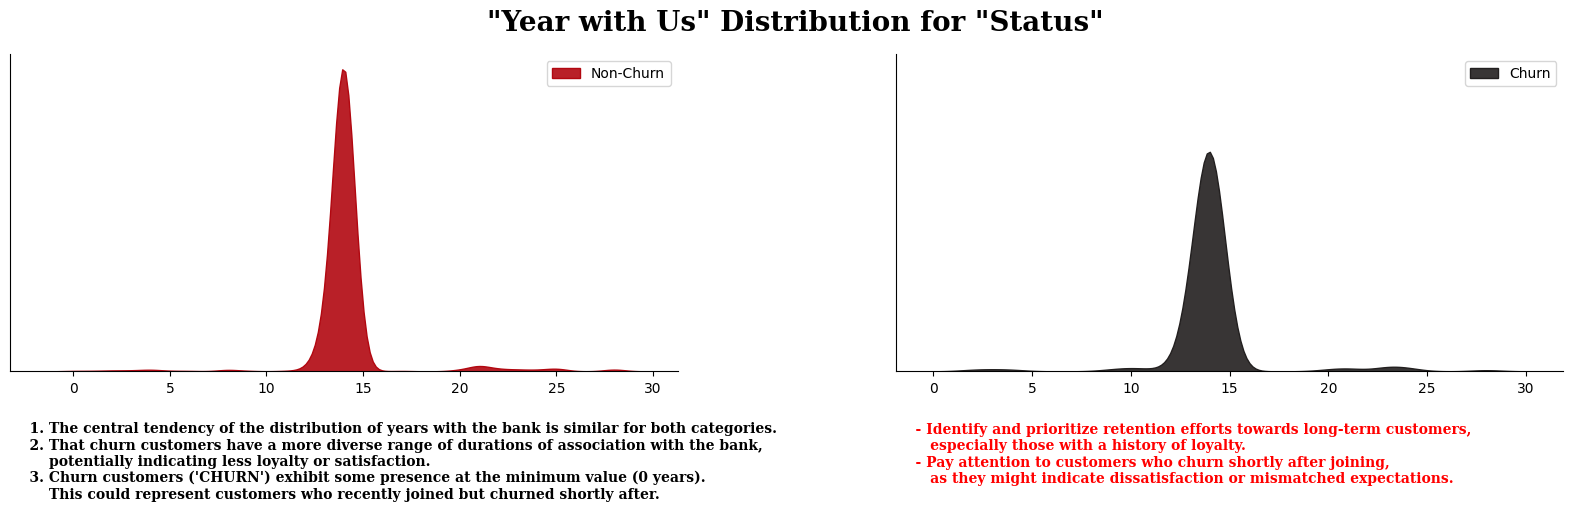

In [92]:
# Define legend labels for each status class
legend_labels = ['Non-Churn', 'Churn']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot KDE plots for each status class
for ax, status, color, legend_label in zip(axes, df['status'].unique(), colors, legend_labels):
    sns.kdeplot(data=df[df['status'] == status], x='years_with_us', color=color, fill=True, alpha=0.9, ax=ax)
    plt.suptitle(f'"Year with Us" Distribution for "Status"', fontfamily='serif', fontsize=20, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(True)  # Remove left spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Hide left y-axis ticks and labels
    ax.legend([legend_label], loc='upper right')
    obser1 = """ 
    1. The central tendency of the distribution of years with the bank is similar for both categories.
    2. That churn customers have a more diverse range of durations of association with the bank, 
        potentially indicating less loyalty or satisfaction.
    3. Churn customers ('CHURN') exhibit some presence at the minimum value (0 years). 
        This could represent customers who recently joined but churned shortly after.
    """
    obser2 = """ 
    - Identify and prioritize retention efforts towards long-term customers, 
       especially those with a history of loyalty.
    - Pay attention to customers who churn shortly after joining, 
       as they might indicate dissatisfaction or mismatched expectations.
    """
    # Add text to the subplot
    if legend_label == "Non-Churn":
        ax.text(0.0, -0.45, obser1, transform=ax.transAxes, horizontalalignment='left', fontsize=10, fontweight='bold', fontfamily='serif')
    elif legend_label == "Churn":
        ax.text(0., -0.4, obser2, transform=ax.transAxes, horizontalalignment='left', fontsize=10, fontweight='bold', fontfamily='serif', color='red')

# Set the same y-axis limits for both axes
max_y = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_y)
plt.tight_layout()
plt.savefig("../plots/ppts_figs/year_with_us_dist_with_status.png")
plt.show()

In [8]:
churn_customers = df[df['CUS_Target'] == 1].sample(n=100, replace=True, random_state=42)

# Product recommendations based on characteristics
product_recommendations = pd.DataFrame()
product_recommendations['CUS_Gender'] = churn_customers['CUS_Gender']
product_recommendations['CUS_Marital_Status'] = churn_customers['CUS_Marital_Status']
product_recommendations['Recommended_Product'] = ['Product_A'] * 100  # Example recommendation

# Save the recommendation dataset
product_recommendations.to_csv("churn_customer_recommendations.csv", index=False)

ValueError: a must be greater than 0 unless no samples are taken

### <center><b><u><span style="color:#ff6600">The label encoding transformation for categorical features:</span></u></b></center>
- We creating a deep copy of the orginal dataset and label encoding the text data.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.

In [174]:
encoded_df = helper.label_encode_categorical(df, cat_cols.columns)


NameError: name 'cat_cols' is not defined

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

- We creating a `deep copy` of the orginal dataset and `label encoding the text data`.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.
</div>

In [17]:
encoded_df.status.value_counts()

status
0    1022
1     227
Name: count, dtype: int64

In [18]:
churn = encoded_df[encoded_df['status'] == 1].describe().T
not_churn = encoded_df[encoded_df['status'] == 0].describe().T

#### Thoughts: 
    1. I want to check two groups which are Churn and Non-churn customers avg values of each features and check how mean values are different in each groups.

In [19]:
not_churn[['mean']]

,mean
cus_dob,1972-08-21 07:19:36.516634048
age,46.820939
cus_month_income,2685969.207695
cus_gender,0.575342
cus_marital_status,3.068493
cus_customer_since,2005-06-13 10:53:46.614481408
years_with_us,14.131115
total_debit_trans_s1,62.925636
total_debit_trans_s2,65.280822
total_debit_trans_s3,68.292564


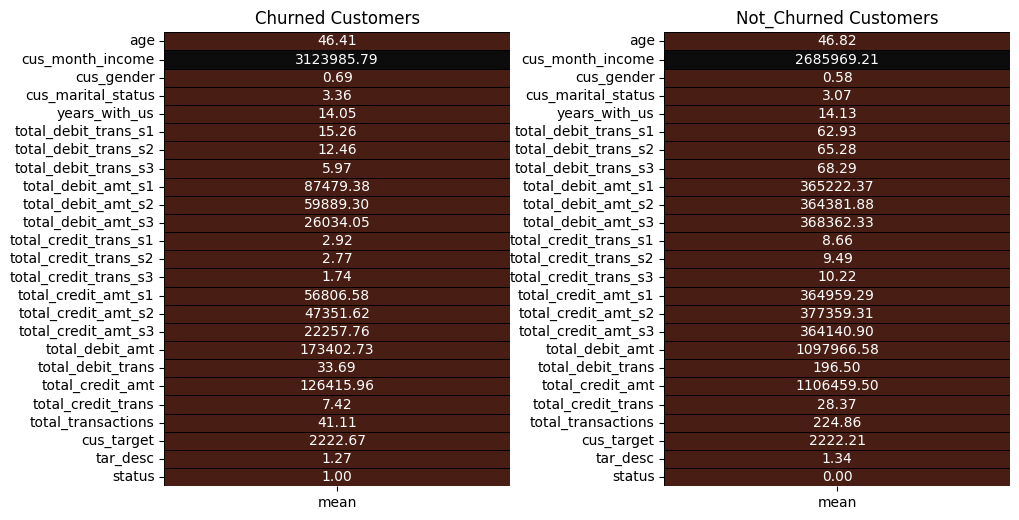

In [22]:
# encoded_df.drop(['cus_dob', "cus_customer_since"], axis=1, inplace=True)
colors = ['#481E14','#0C0C0C']

churn = encoded_df[encoded_df['status'] == 1].describe().T
not_churn = encoded_df[encoded_df['status'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.6,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.6,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)
fig.savefig(config.PLOT_FILES+f"Mean_values_features_churned_and_not_churned_customers.jpg", dpi=200)
plt.show()

<div style=" background-color:#31363F;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

* Mean values of all the features for `churned` and `not-churned customers`.
* Clearly, the customers that `churned` had a low mean `total_debit_trans_s1, total_debit_trans_s2` of around 15 as compared to those who continued with an average of `65`.
    but one thing we can noticed to `total_debit_trans_s2` for `churn` which is very low `5.97` campared to `Non-churned-customer` which is significant high `68.29`.
* Same we can see with the `total debit amount for s1,s2 and s3` also significant low than Non_churned_customers. 
* Mean values of `total_credit_trans s1,s2 and s3`, `total_debit_amt`, `total_debit_trans` and `total_transactions` are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
* Churned customer's `total_credit_trans` value is much smaller than those of not-churned customers.

**Note: From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.**
</div>

### `Several reasons could explain why churned customers exhibit lower mean values for certain features compared to not-churned customers:`

1. **Financial Stability**: Churned customers may be experiencing financial instability or facing economic challenges, leading to lower total debit transactions and amounts. This could be due to factors such as unemployment, reduced income, or unexpected expenses.

2. **Dissatisfaction with Services**: Churned customers might be dissatisfied with the services provided by the company, leading them to reduce their usage of debit transactions and credit transactions. Poor customer service, high fees, or lack of desirable features could contribute to this dissatisfaction.

3. **Competitive Offers**: Churned customers may have been attracted by competitive offers or incentives from rival companies, prompting them to switch their financial services provider. These offers may include lower fees, better interest rates, or exclusive rewards programs.

4. **Change in Financial Behavior**: Churned customers may have undergone a change in their financial behavior, such as adopting a more conservative approach to spending or seeking alternative financial products. This change could result from personal financial goals, lifestyle changes, or market trends.

5. **Customer Segmentation**: Churned customers may belong to a different segment or demographic group with distinct financial needs and preferences. Understanding these differences can help tailor products and services to better meet the needs of both churned and not-churned customers.

6. **Communication and Engagement**: Churned customers may have received inadequate communication or engagement from the company, leading to a lack of awareness about available products, services, or benefits. Improving communication strategies and engagement efforts could help retain customers and prevent churn.

7. **Market Conditions**: External factors such as economic downturns, changes in regulatory policies, or shifts in consumer behavior may influence the financial decisions of customers and contribute to churn.


# <center><b><u><span style="color:#ff6600">EDA</span></u></b></center>

In [30]:

cat_cols = df.select_dtypes(include='object')
l1 = cat_cols[['cus_gender', 'cus_marital_status']].columns.tolist()
l1

['cus_gender', 'cus_marital_status']

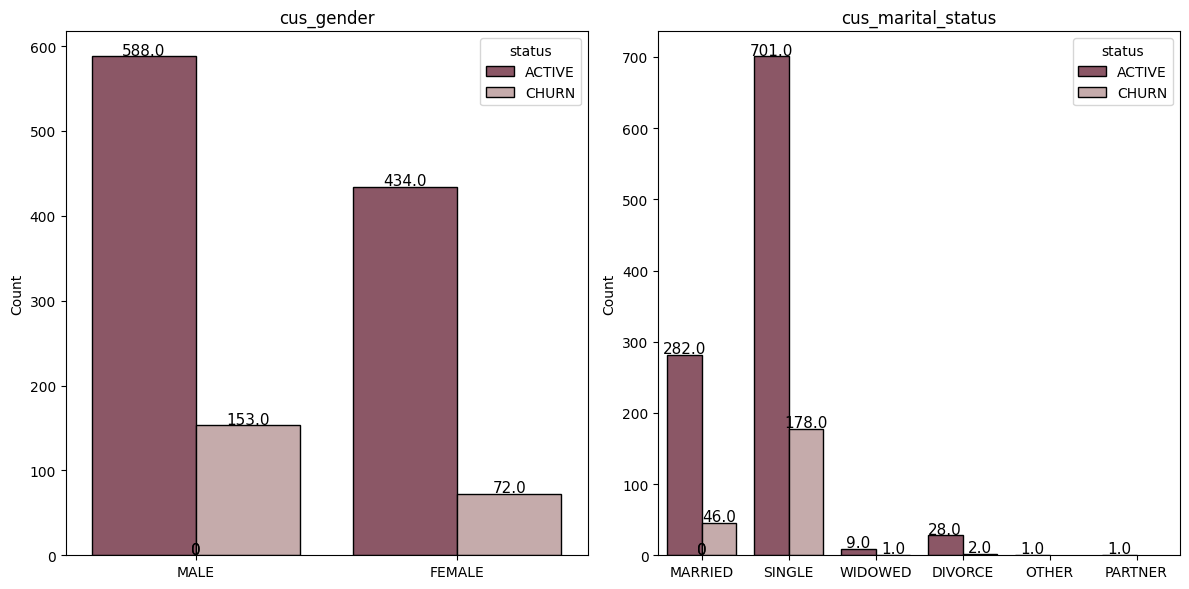

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figsize as needed
colors = ["#944E63", "#CAA6A6"]
for i, ax in enumerate(axes.flatten()):
    if i < len(l1):
        sns.countplot(x=l1[i], data=df, hue="status", palette=colors, edgecolor='black', ax=ax)
        ax.set_title(l1[i])
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        # Add counts on top of each bar
        for rect in ax.patches:
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

    plt.tight_layout()

plt.show()

<div style=" background-color:#31363F;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

* The data highlights a higher proportion of male customers compared to female customers, with a relatively higher churn rate among males. This suggests a potential gender-specific trend in churn behavior that warrants further investigation. Businesses can leverage these insights to tailor retention strategies, addressing specific concerns or preferences among male customers to mitigate churn and enhance overall customer retention efforts.

* The data provides insights into customer churn based on marital status. While single customers comprise the largest group, they also exhibit the highest churn rate. Conversely, married customers, despite being a smaller group, demonstrate comparatively lower churn. Understanding these trends can inform tailored retention strategies, potentially focusing on addressing the needs and concerns of single customers to improve overall retention rates and enhance customer satisfaction and loyalty.
</div>

### **Thoughts behind the above observation:**
1. `Gender-Specific Trends`:
    * **Differences in Financial Behavior**: Males and females may have distinct financial behaviors, such as spending habits, investment preferences, or risk tolerance levels. If males exhibit higher churn rates, it could be due to factors such as dissatisfaction with specific financial products or services, changes in income or employment status, or preferences for alternative banking solutions.
    * **Communication and Engagement**: Gender-specific communication preferences and engagement strategies may influence churn rates. Tailoring communication channels, messaging, and outreach efforts to resonate with male customers' preferences and needs could help improve retention rates.

2. `Marital Status`:
    * **Financial Responsibilities**: Married individuals may have greater financial stability and shared responsibilities, leading to lower churn rates. They may also have joint accounts or shared financial goals, which could contribute to higher loyalty and retention.
    * **Life Events**: Single individuals may undergo significant life events such as job changes, relocations, or relationship status changes, which could impact their financial decisions and banking relationships. Addressing the unique needs and challenges faced by single customers during such transitions could help improve retention rates.
    * **Social Support**: Married individuals may benefit from social support networks and shared decision-making processes, which could positively influence their banking behaviors and loyalty to their financial institution.

In [34]:
encoded_df.groupby('status').corr().reset_index()

,status,level_1,age,cus_month_income,cus_gender,cus_marital_status,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,total_debit_amt_s1,total_debit_amt_s2,total_debit_amt_s3,total_credit_trans_s1,total_credit_trans_s2,total_credit_trans_s3,total_credit_amt_s1,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc
0,0,age,1.000000,0.101863,-0.036840,-0.265729,0.109311,-0.068171,-0.080718,-0.064620,-0.006234,-0.014578,-0.011422,-0.061543,-0.090280,-0.085673,0.007927,-0.004895,-0.023985,-0.012422,-0.074416,-0.006165,-0.085052,-0.079015,-0.036799,-0.066483
1,0,cus_month_income,0.101863,1.000000,0.007847,-0.073591,-0.088603,0.100928,0.082618,0.084604,0.051209,0.002904,0.094016,0.078473,0.051076,0.026092,-0.006672,-0.000734,-0.000336,0.053879,0.093563,-0.003283,0.055185,0.091860,-0.081744,0.017989
2,0,cus_gender,-0.036840,0.007847,1.000000,0.036792,0.028704,0.062907,0.059949,0.044010,0.046031,0.040178,0.068059,0.024446,0.045707,0.031134,0.050699,0.056118,0.066434,0.059012,0.058061,0.061282,0.036106,0.057271,-0.038456,-0.019691
3,0,cus_marital_status,-0.265729,-0.073591,0.036792,1.000000,-0.106508,-0.157766,-0.128949,-0.143509,-0.071775,-0.100600,-0.138759,-0.135500,-0.134889,-0.106235,-0.130148,-0.159781,-0.113988,-0.117440,-0.150237,-0.142162,-0.134327,-0.154112,0.111002,-0.083624
4,0,years_with_us,0.109311,-0.088603,0.028704,-0.106508,1.000000,0.076269,0.085453,0.129549,0.005574,0.016400,-0.031149,0.113657,0.109788,0.099207,0.029873,0.050055,0.044318,0.000123,0.102242,0.042681,0.115291,0.108334,0.071242,0.004395
5,0,total_debit_trans_s1,-0.068171,0.100928,0.062907,-0.157766,0.076269,1.000000,0.885947,0.827413,0.299415,0.317168,0.433100,0.630576,0.606807,0.519768,0.285014,0.379706,0.336186,0.404020,0.946107,0.349676,0.627380,0.938882,-0.107590,0.118020
6,0,total_debit_trans_s2,-0.080718,0.082618,0.059949,-0.128949,0.085453,0.885947,1.000000,0.889620,0.291515,0.399344,0.453374,0.587022,0.657647,0.556798,0.313656,0.468044,0.388302,0.440205,0.968297,0.405285,0.643426,0.961096,-0.122825,0.128841
7,0,total_debit_trans_s3,-0.064620,0.084604,0.044010,-0.143509,0.129549,0.827413,0.889620,1.000000,0.292823,0.395731,0.524572,0.578954,0.636793,0.644028,0.336433,0.470580,0.453371,0.460638,0.950160,0.438628,0.666006,0.948105,-0.072961,0.151382
8,0,total_debit_amt_s1,-0.006234,0.051209,0.046031,-0.071775,0.005574,0.299415,0.291515,0.292823,1.000000,0.656051,0.409690,0.168201,0.165233,0.137276,0.599191,0.548844,0.495090,0.872838,0.308523,0.591652,0.168003,0.300873,-0.216996,0.199263
9,0,total_debit_amt_s2,-0.014578,0.002904,0.040178,-0.100600,0.016400,0.317168,0.399344,0.395731,0.656051,1.000000,0.538995,0.192870,0.228605,0.200523,0.891846,0.799615,0.882072,0.888498,0.388661,0.926016,0.222317,0.380569,-0.112869,0.170311


In [35]:
correlation_df = encoded_df.groupby('status').corr().reset_index().query('(level_1 == "age")').T.reset_index()
correlation_df = correlation_df.rename(columns={'index': 'Name', 0: 'non_churn_customer', 1: 'churn_customer'})
correlation_df = correlation_df.drop(index=[0,1])
correlation_df


,Name,non_churn_customer,24
2,age,1.0,1.0
3,cus_month_income,0.101863,0.16488
4,cus_gender,-0.03684,0.227061
5,cus_marital_status,-0.265729,-0.412314
6,years_with_us,0.109311,0.26181
7,total_debit_trans_s1,-0.068171,-0.073713
8,total_debit_trans_s2,-0.080718,-0.070425
9,total_debit_trans_s3,-0.06462,-0.16553
10,total_debit_amt_s1,-0.006234,-0.051627
11,total_debit_amt_s2,-0.014578,-0.043641


In [36]:
correlation_df = encoded_df.groupby('status').corr().reset_index().query('(status == 0 & level_1 == "age") or (status == 1 & level_1 == "age")').T.reset_index()
correlation_df = correlation_df.rename(columns={'index': 'Name', 0: 'non_churn_customer', 24: 'churn_customer'})
correlation_df

,Name,non_churn_customer,churn_customer
0,status,0,1
1,level_1,age,age
2,age,1.0,1.0
3,cus_month_income,0.101863,0.16488
4,cus_gender,-0.03684,0.227061
5,cus_marital_status,-0.265729,-0.412314
6,years_with_us,0.109311,0.26181
7,total_debit_trans_s1,-0.068171,-0.073713
8,total_debit_trans_s2,-0.080718,-0.070425
9,total_debit_trans_s3,-0.06462,-0.16553


In [81]:
encoded_df.corr()

,age,cus_month_income,cus_gender,cus_marital_status,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,total_debit_amt_s1,total_debit_amt_s2,total_debit_amt_s3,total_credit_trans_s1,total_credit_trans_s2,total_credit_trans_s3,total_credit_amt_s1,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
age,1.000000,0.117605,-0.003126,-0.295614,0.102652,-0.054371,-0.063022,-0.047059,-0.006250,-0.010715,-0.006493,-0.047486,-0.072451,-0.064642,0.008946,0.000181,-0.017933,-0.009361,-0.057268,-0.002186,-0.066096,-0.060845,-0.037266,-0.043780,-0.032697
cus_month_income,0.117605,1.000000,0.011612,-0.061110,-0.082409,0.120285,0.114813,0.063539,0.053857,0.042222,0.075691,0.110193,0.107411,0.029434,0.007202,0.055385,0.002576,0.065924,0.103635,0.019832,0.087691,0.105445,-0.039658,0.056281,0.031145
cus_gender,-0.003126,0.011612,1.000000,0.034926,0.036184,0.033946,0.027759,0.013686,0.037102,0.025430,0.049907,0.006984,0.020044,0.009561,0.039015,0.035189,0.052379,0.043241,0.026123,0.045383,0.013071,0.025259,-0.036828,-0.027500,0.078130
cus_marital_status,-0.295614,-0.061110,0.034926,1.000000,-0.118360,-0.156300,-0.132096,-0.148839,-0.068460,-0.098052,-0.137759,-0.128295,-0.125807,-0.110522,-0.125188,-0.153845,-0.112741,-0.114476,-0.152611,-0.138142,-0.130282,-0.155444,0.117322,-0.091037,0.079683
years_with_us,0.102652,-0.082409,0.036184,-0.118360,1.000000,0.084835,0.092028,0.138055,0.009358,0.021080,-0.018015,0.118769,0.110060,0.106443,0.032861,0.052397,0.046103,0.007807,0.110424,0.045384,0.119847,0.116211,0.057713,0.006030,-0.023584
total_debit_trans_s1,-0.054371,0.120285,0.033946,-0.156300,0.084835,1.000000,0.892242,0.828464,0.313514,0.336742,0.444975,0.639572,0.614683,0.542295,0.297102,0.403770,0.345513,0.422507,0.948095,0.365781,0.641873,0.941228,-0.104327,0.133980,-0.227693
total_debit_trans_s2,-0.063022,0.114813,0.027759,-0.132096,0.092028,0.892242,1.000000,0.886218,0.305045,0.416319,0.463725,0.603677,0.666752,0.579823,0.323787,0.489704,0.394262,0.456791,0.968992,0.418885,0.661444,0.962766,-0.115251,0.142562,-0.250536
total_debit_trans_s3,-0.047059,0.063539,0.013686,-0.148839,0.138055,0.828464,0.886218,1.000000,0.296541,0.403412,0.537334,0.577633,0.623898,0.663755,0.341453,0.479936,0.460931,0.469361,0.948856,0.446968,0.667799,0.945695,-0.079443,0.151347,-0.283349
total_debit_amt_s1,-0.006250,0.053857,0.037102,-0.068460,0.009358,0.313514,0.305045,0.296541,1.000000,0.651406,0.409118,0.175630,0.170248,0.147875,0.603256,0.543603,0.491898,0.871977,0.319190,0.591678,0.176396,0.311078,-0.210634,0.197662,-0.070781
total_debit_amt_s2,-0.010715,0.042222,0.025430,-0.098052,0.021080,0.336742,0.416319,0.403412,0.651406,1.000000,0.542356,0.212079,0.247668,0.217432,0.889089,0.803310,0.878698,0.887405,0.403892,0.925761,0.242166,0.396398,-0.106477,0.172713,-0.090481


In [173]:
# Let see the correlation between the features
col = ["#662549", "#FDF0F0",'#F1B4BB', '#1F4172', '#132043']
plt.figure(figsize = (20,10))
sns.heatmap(encoded_df.corr(),cmap = col,annot = True, mask=np.triu(encoded_df.corr()), linewidths=3)
plt.tight_layout()
plt.show()

NameError: name 'encoded_df' is not defined

<Figure size 2000x1000 with 0 Axes>

## <center>**`Observation:`**</center>

1. **Strong correlations with status (target feature)**:
   - The features `"age," "years_with_us," "total_debit_trans," "total_transactions," and "tar_desc"` have relatively higher absolute correlation values with the target feature `"status"` compared to other features. 
   - Among these, `"total_transactions"` and `"total_debit_trans"` show the strongest positive correlations with `"status,"` indicating that customers who have higher total transactions and total debit transactions are more likely to churn.
   - `"Age"` also shows a moderate negative correlation with `"status,"` suggesting that younger customers might be more likely to churn.
   - The `"tar_desc"` feature (target description) shows a moderate positive correlation with `"status,"` implying that certain target descriptions might indicate a higher likelihood of churn.

2. **Weak correlations with status (target feature)**:
   - Features such as `"cus_month_income," "total_credit_trans," "total_credit_amt,"` , have relatively weaker correlations with the target feature `"status."` These features might not be strong indicators of churn on their own.

3. **Correlation among features**:
   - Several features related to transaction behavior `("total_debit_trans_s1," "total_credit_trans_s1,"` etc.) are highly correlated with each other, indicating `multicollinearity` among these features. This multicollinearity can affect the performance of certain machine learning models and might require `feature selection` or `dimensionality reduction techniques`.
   - The `cus_marital_status"` feature shows a moderate negative correlation with `"age,"` indicating that younger customers might be more likely to be single, which could be a factor contributing to churn.
   - There are also strong correlations among transaction-related features across different time periods (e.g., `"total_debit_trans_s1" with "total_debit_trans_s2," "total_debit_trans_s3,"` etc.), indicating consistent behavior over time.

4. **Assumptions**:
   - Higher `total transactions` and `total debit transactions` might indicate active usage of banking services, but if these customers are not satisfied with the bank's services, they might be more likely to churn.
   - `Younger customer`s might be more tech-savvy and open to switching banks if they find better digital services elsewhere.
   - Certain target descriptions might indicate specific customer segments or behaviors that are more prone to churn, such as customers targeted with certain marketing campaigns or offers.

5. **Transaction-related features**: Customers who conduct more transactions, whether debit or credit, might be more engaged with the bank. Higher transaction counts or amounts could indicate loyalty or a strong relationship with the bank, potentially reducing the likelihood of churn.

6. **Income level**: Higher income customers may have more stable financial situations, making them less likely to churn. They might also have access to premium banking services, which could increase their retention.

7. **Customer demographics**: Factors like `age, gender, and marital` status might influence banking behavior and, consequently, churn. For example, younger customers might be more likely to switch banks due to life changes or better offers elsewhere.

8. **Tenure with the bank**: Longer-tenured customers might have established relationships with the bank, reducing the likelihood of churn. This is reflected in the negative correlation observed with the `"years_with_us"` feature.


In [55]:
encoded_df.dropna(inplace=True)

In [56]:
X = encoded_df.drop('status', axis=1).values
y = encoded_df.status.values

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify=y, random_state=config.SEED)


In [59]:
X_train.shape

(928, 24)

In [60]:
scaler = preprocessing.RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
x_train_scaled.shape

(928, 24)

In [62]:
import math 
def plot_feature_distributions(X_before_scaling, X_after_scaling):
    num_features = X_before_scaling.shape[1]
    num_rows = math.ceil(num_features / 2)  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))
    
    for i in range(num_features):
        row_index = i // 2  # Calculate the row index for the current feature
        
        # Plot distribution before scaling
        sns.histplot(X_before_scaling[:, i], ax=axes[row_index, 0], kde=True, color='blue', alpha=0.5, label='Before Scaling', stat='density')
        axes[row_index, 0].set_title(f'Feature {i+1} Before Scaling')
        axes[row_index, 0].legend()
        
        # Plot distribution after scaling
        sns.histplot(X_after_scaling[:, i], ax=axes[row_index, 1], kde=True, color='red', alpha=0.5, label='After Scaling', stat='density')
        axes[row_index, 1].set_title(f'Feature {i+1} After Scaling')
        axes[row_index, 1].legend()
    
    plt.tight_layout()
    plt.show()


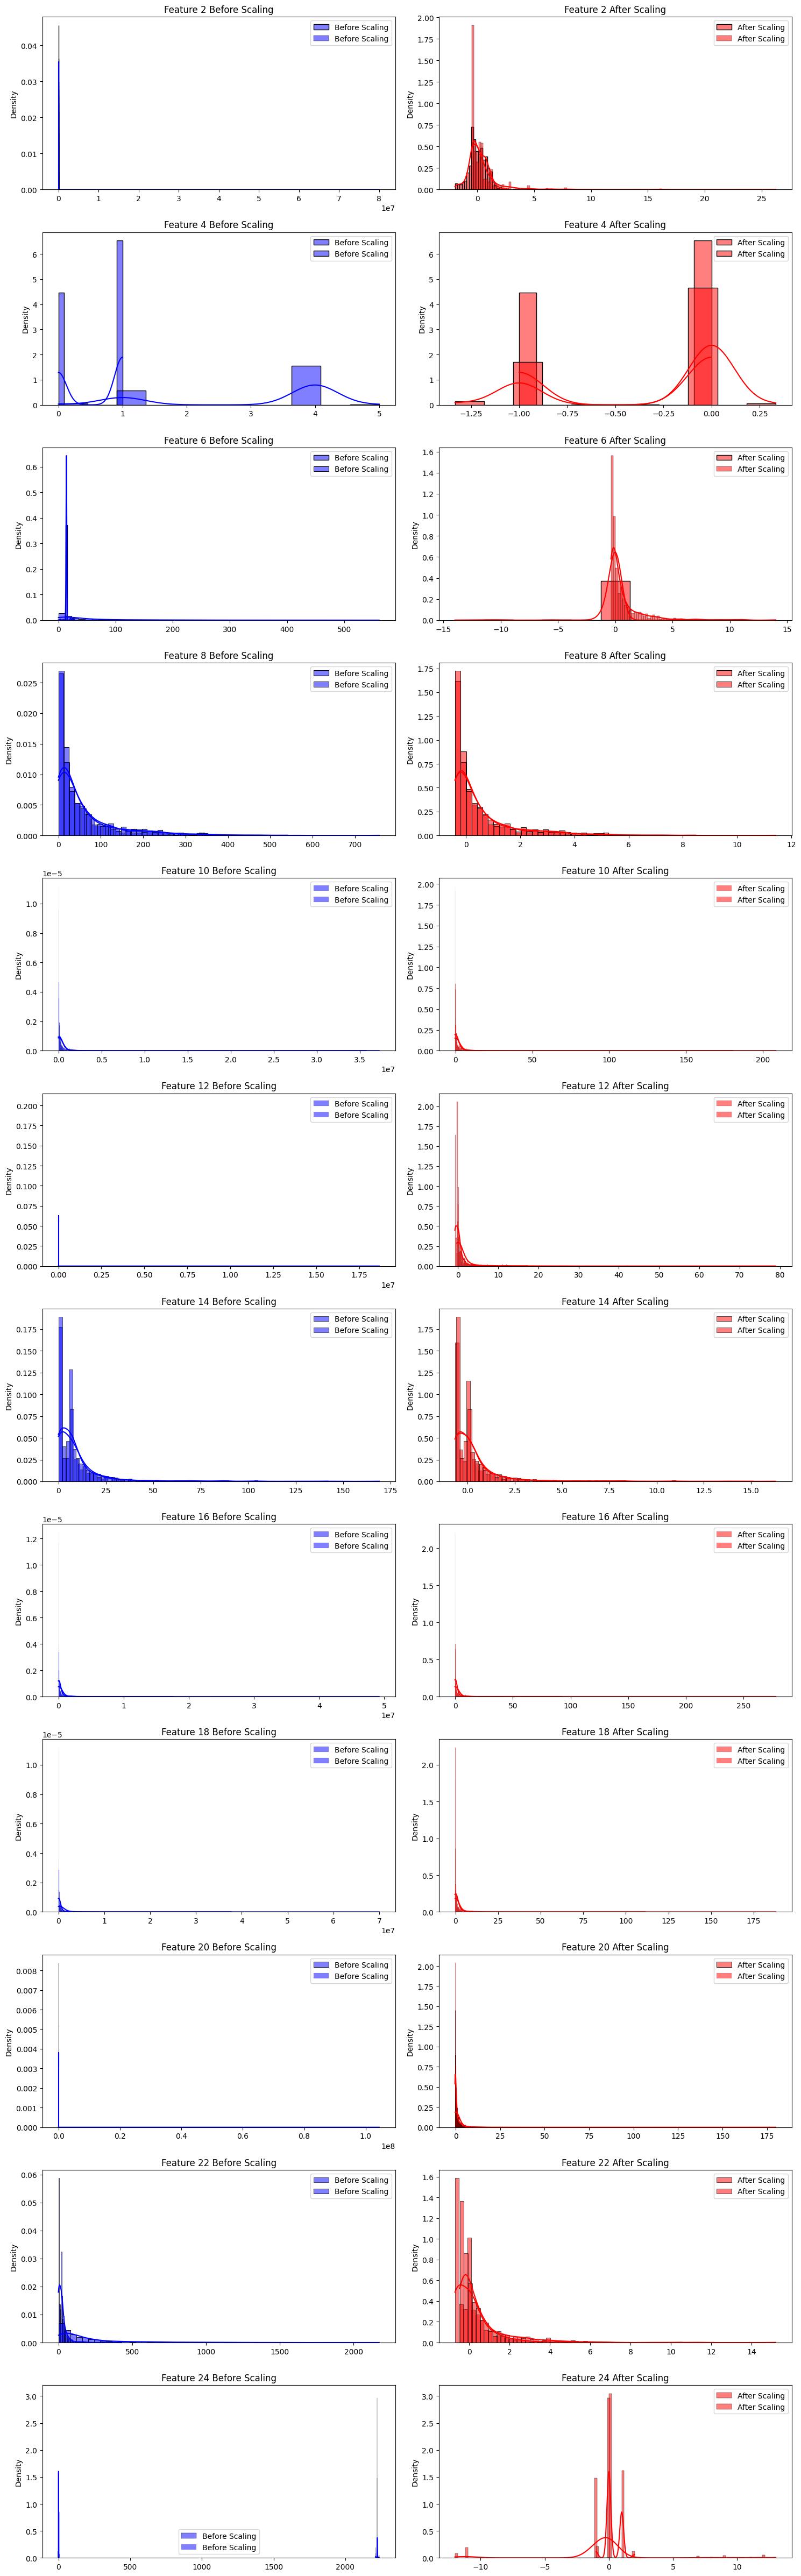

In [63]:
plot_feature_distributions(X_train, x_train_scaled)

In [66]:
x_train_scaled

array([[-1.15625   , -0.43450102, -1.        , ..., -0.46075949,
         0.        ,  0.        ],
       [ 0.65625   ,  2.76073825,  0.        , ...,  2.83037975,
         8.        , -1.        ],
       [ 0.59375   ,  0.50134733,  0.        , ..., -0.14683544,
         0.        ,  0.        ],
       ...,
       [ 0.96875   , -0.50051175,  0.        , ..., -0.11139241,
        -1.        ,  1.        ],
       [-0.15625   ,  0.16711578, -1.        , ...,  0.13670886,
         0.        ,  0.        ],
       [ 0.03125   ,  0.50134733, -1.        , ..., -0.4556962 ,
         0.        ,  0.        ]])

In [67]:
lr_model = linear_model.LogisticRegression(max_iter=1_000)
lr_model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [68]:
preds = lr_model.predict_proba(X_test_scaled)[:,1]

In [69]:
# y_test = y_test.reshape(-1)
metrics.roc_auc_score(y_test, preds)

0.8869516310461193

In [70]:
y_preds = lr_model.predict(X_test_scaled)
# Check the dimensions of y_test and y_preds
print("Dimensions of y_test:", y_test.shape)
print("Dimensions of y_preds:", y_preds.shape)
# metrics.classification_report(y_test, y_preds)

Dimensions of y_test: (310,)
Dimensions of y_preds: (310,)


In [71]:
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       254
           1       0.73      0.39      0.51        56

    accuracy                           0.86       310
   macro avg       0.81      0.68      0.72       310
weighted avg       0.85      0.86      0.85       310



In [72]:
scores = model_selection.cross_val_score(lr_model, X, y, cv=5, scoring="roc_auc")
# Calculate the mean and standard deviation of ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the mean and standard deviation of the ROC-AUC score
print("Mean ROC-AUC Score:", mean_score)
print("Standard Deviation of ROC-AUC Score:", std_score)

Mean ROC-AUC Score: 0.8491207642931782
Standard Deviation of ROC-AUC Score: 0.02949531427152914


In [73]:
scores = model_selection.cross_val_score(lr_model, X, y, cv=10, scoring="roc_auc",)
# Calculate the mean and standard deviation of ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the mean and standard deviation of the ROC-AUC score
print("Mean ROC-AUC Score:", mean_score)
print("Standard Deviation of ROC-AUC Score:", std_score)

Mean ROC-AUC Score: 0.8529214174614392
Standard Deviation of ROC-AUC Score: 0.02467289761739904


In [76]:
# Define the number of splits for StratifiedKFold
n_splits = 5

# Initialize StratifiedKFold
skf = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store F1 scores for each fold
f1_scores = []
train_scores = []
test_scores = []

# Iterate through each fold
for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train your model on the training data for this fold
    lr_model.fit(X_train, y_train)
    
    # Predict classes on the training and validation data for this fold
    y_pred_train = lr_model.predict(X_train)
    y_pred_val = lr_model.predict(X_val)
    
    # Calculate F1 score for this fold and append to list
    f1_score_train = metrics.roc_auc_score(y_train, y_pred_train)
    f1_score_val = metrics.roc_auc_score(y_val, y_pred_val)
    f1_scores.append(f1_score_val)
    
    # Store training and validation scores
    train_scores.append(f1_score_train)
    test_scores.append(f1_score_val)
    
    # Print the training and validation scores for this fold
    print(f"Fold {fold_idx}: Train F1 Score: {f1_score_train:.4f}, Test F1 Score: {f1_score_val:.4f}")

# Calculate the mean and standard deviation of F1 scores across all folds
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean F1 Score:", mean_f1_score)
print("Standard Deviation of F1 Score:", std_f1_score)

Fold 1: Train F1 Score: 0.6514, Test F1 Score: 0.5939
Fold 2: Train F1 Score: 0.6698, Test F1 Score: 0.6470
Fold 3: Train F1 Score: 0.6773, Test F1 Score: 0.6124
Fold 4: Train F1 Score: 0.6166, Test F1 Score: 0.6695
Fold 5: Train F1 Score: 0.6212, Test F1 Score: 0.6532
Mean F1 Score: 0.6352055033089516
Standard Deviation of F1 Score: 0.027812615701760465


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Define the number of splits for StratifiedKFold
n_splits = 5

# Initialize StratifiedKFold
skf = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
model = tree.DecisionTreeClassifier(max_depth=1000)
# Initialize lists to store F1 scores for each fold
f1_scores = []

# Iterate through each fold
for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Initialize a scaler and fit it on the training data for this fold
    scaler = preprocessing.RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Apply the same scaler to the validation data for this fold
    X_val_scaled = scaler.transform(X_val)
    
    # Train your model on the scaled training data for this fold
    model.fit(X_train_scaled, y_train)
    
    # Predict classes on the validation data for this fold
    y_pred_val = model.predict(X_val_scaled)
    
    # Calculate F1 score for this fold and append to list
    f1_score_val = metrics.roc_auc_score(y_val, y_pred_val)
    f1_scores.append(f1_score_val)
    
    # Print the validation score for this fold
    print(f"Fold {fold_idx}: Validation F1 Score: {f1_score_val:.4f}")

# Calculate the mean and standard deviation of F1 scores across all folds
mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean F1 Score:", mean_f1_score)
print("Standard Deviation of F1 Score:", std_f1_score)

Fold 1: Validation F1 Score: 0.6607
Fold 2: Validation F1 Score: 0.7347
Fold 3: Validation F1 Score: 0.6236
Fold 4: Validation F1 Score: 0.6509
Fold 5: Validation F1 Score: 0.6727
Mean F1 Score: 0.6685209235209235
Standard Deviation of F1 Score: 0.03684307431406406
